## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)
# YOUR CODE HERE

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)# YOUR CODE HERE

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
#drop all NaN with .dropna()

bitstamp = bitstamp.dropna()
#check how many are missing values
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

C:\Users\squaw\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype(float)

#review changes
bitstamp.head()
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
#drop NaN
coinbase = coinbase.dropna()
#remove $



In [11]:
#remove $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype(str).str.replace("$", "")
#change to float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype(float)
coinbase.dtypes

C:\Users\squaw\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [12]:
coinbase.drop_duplicates()
#check for duplicates
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [13]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ["Close"]] # YOUR CODE HERE

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, ["Close"]]# YOUR CODE HERE

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [15]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [16]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Close'}, xlabel='Timestamp'>

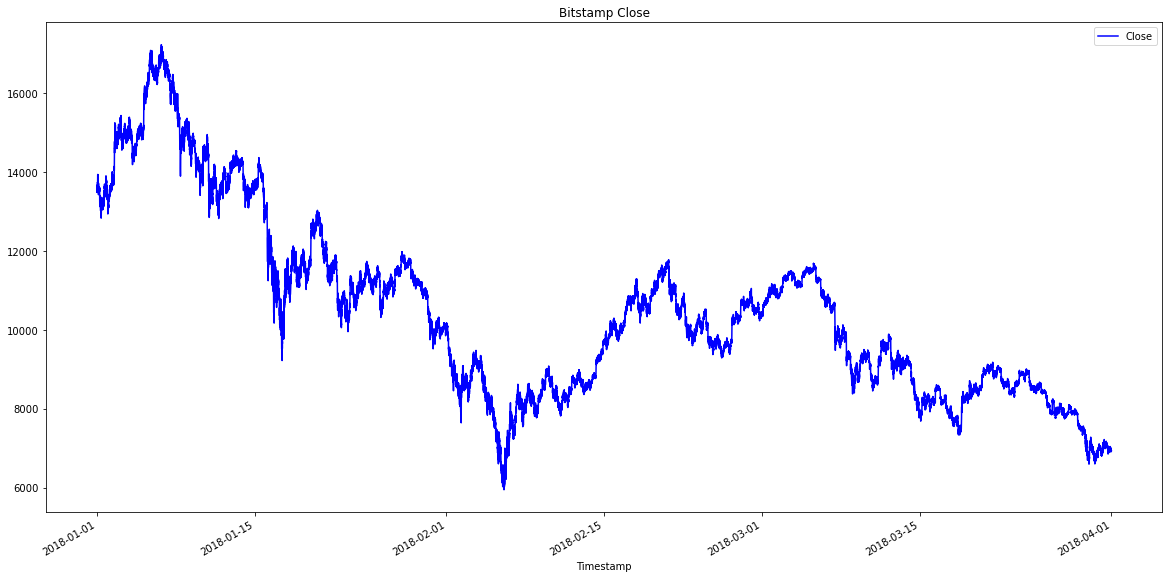

In [17]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(figsize=(20, 10), title="Bitstamp Close", color="blue")

<AxesSubplot:title={'center':'Coinbase Close'}, xlabel='Timestamp'>

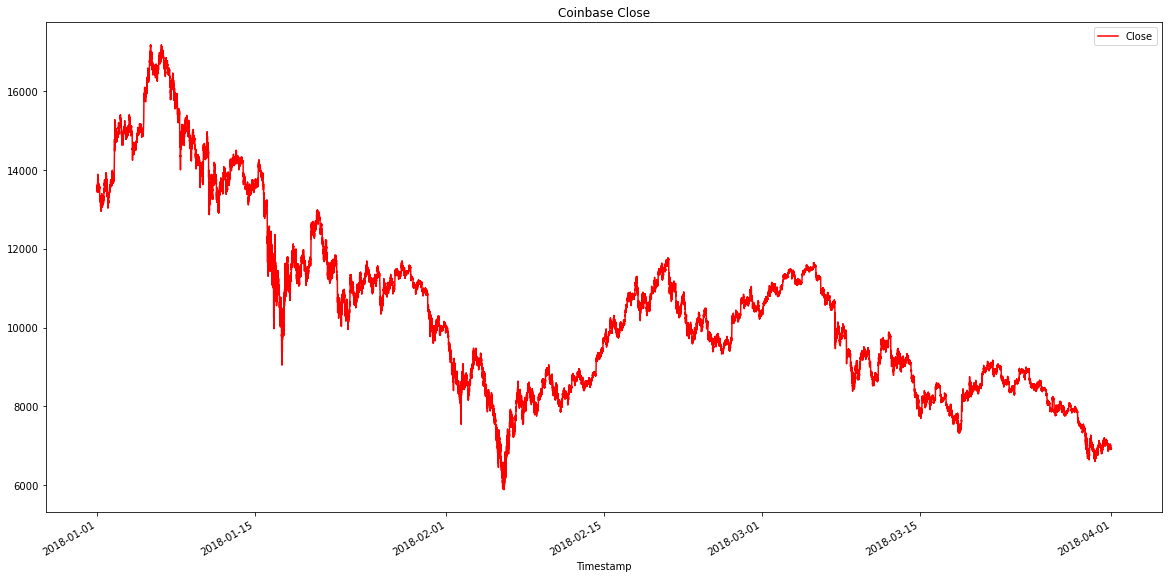

In [18]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(figsize=(20, 10), title="Coinbase Close", color="red")

<AxesSubplot:title={'center':'Bitcoin Price'}, xlabel='Timestamp'>

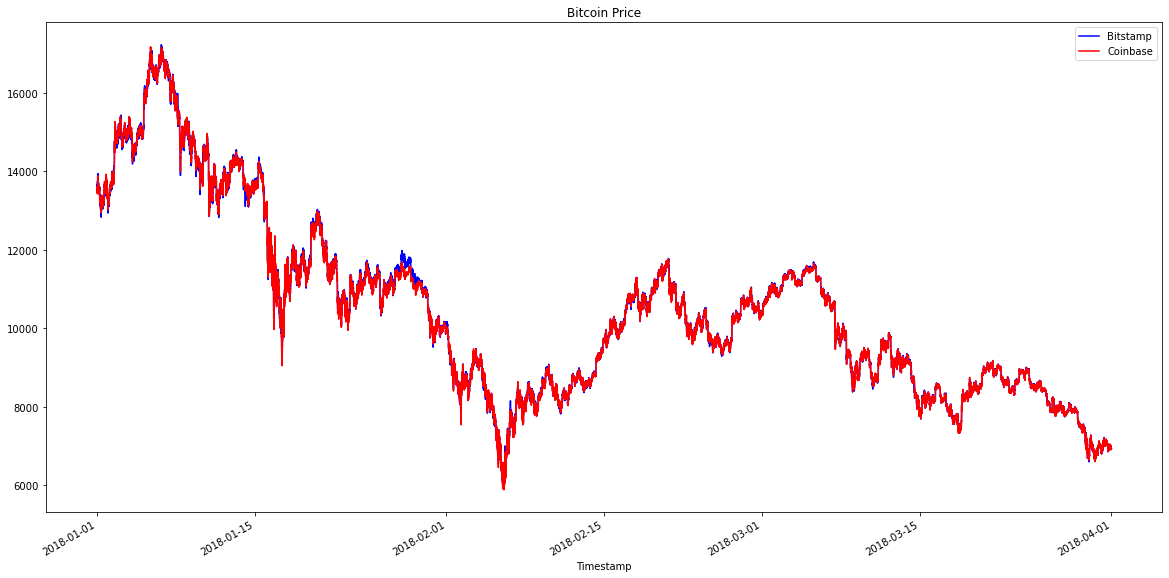

In [19]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp["Close"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price", color="blue", label="Bitstamp")
coinbase["Close"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Bitcoin Price January 2018'}, xlabel='Timestamp'>

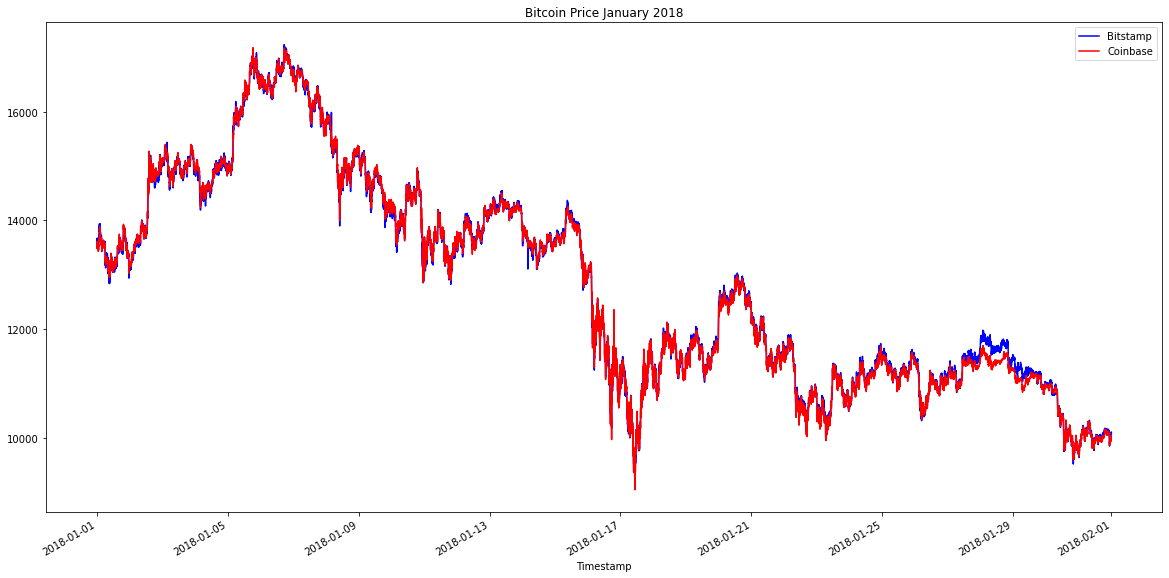

In [20]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp["Close"].loc["2018-01-01" : "2018-01-31"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price January 2018", color="blue", label="Bitstamp")
coinbase["Close"].loc["2018-01-01" : "2018-01-31"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Bitcoin Price February 2018'}, xlabel='Timestamp'>

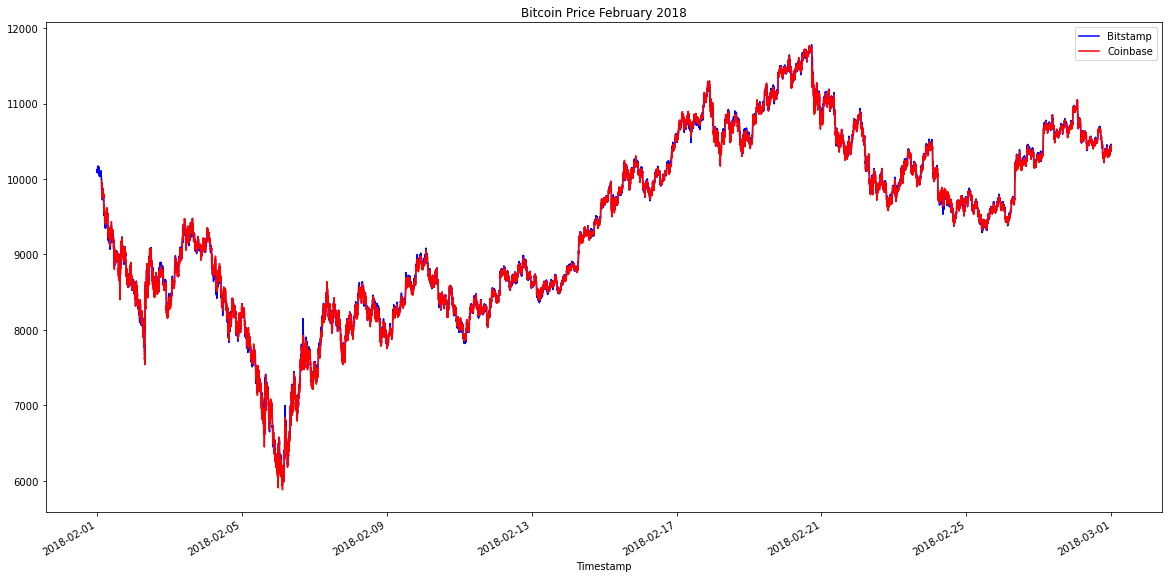

In [21]:
bitstamp["Close"].loc["2018-02-01" : "2018-02-28"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price February 2018", color="blue", label="Bitstamp")
coinbase["Close"].loc["2018-02-01" : "2018-02-28"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Bitcoin Price March 2018'}, xlabel='Timestamp'>

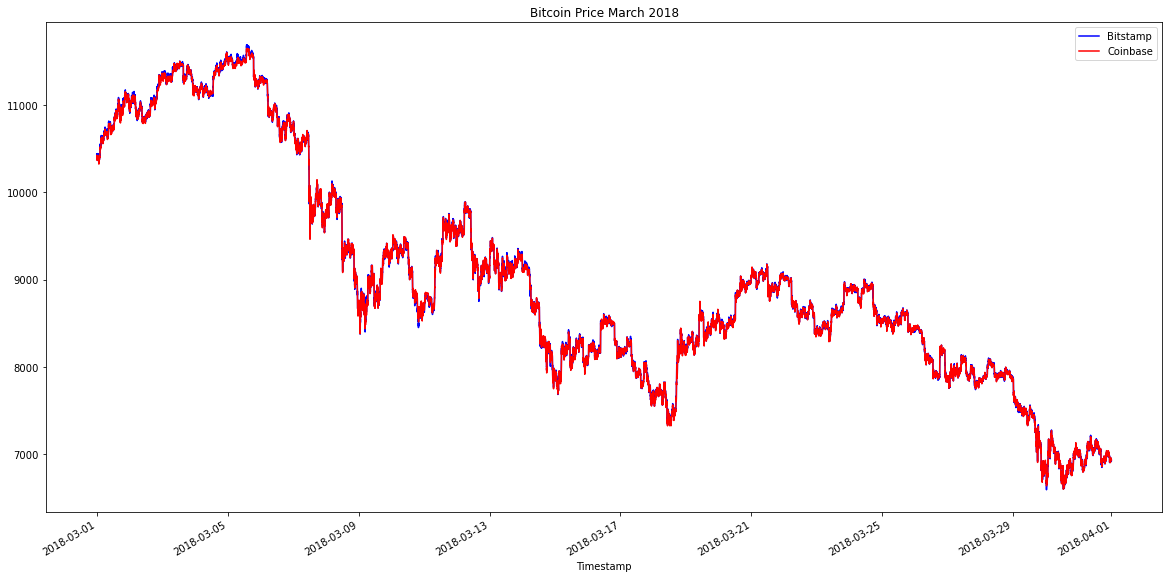

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp["Close"].loc["2018-03-01" : "2018-03-31"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price March 2018", color="blue", label="Bitstamp")
coinbase["Close"].loc["2018-03-01" : "2018-03-31"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** As time has progressed the spread between the markets has decreased.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitcoin Price January 10, 2018'}, xlabel='Timestamp'>

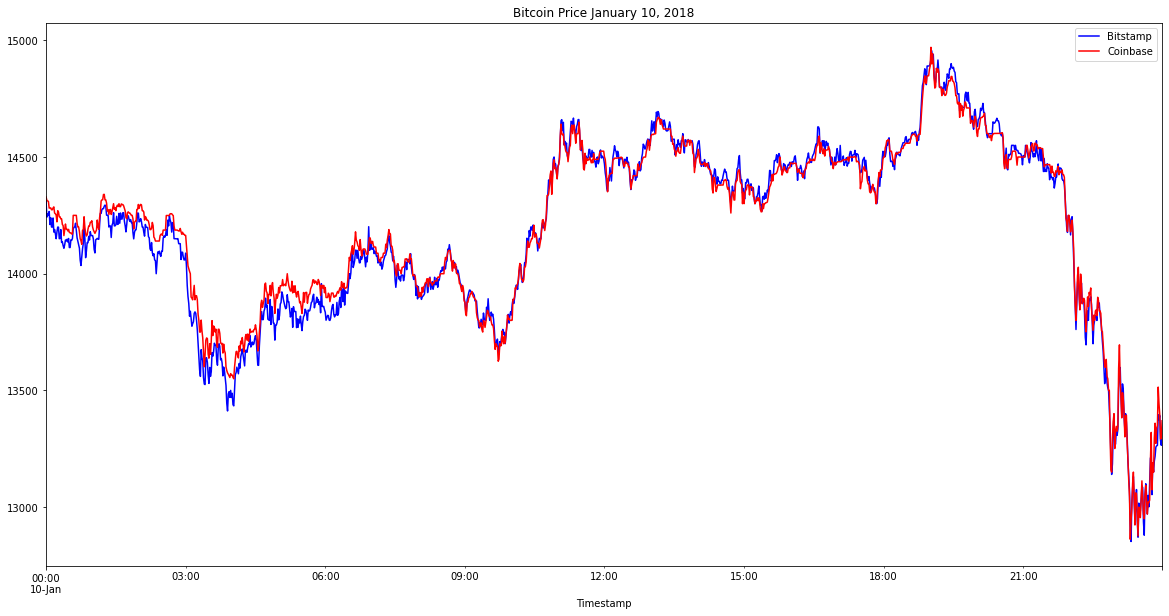

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp["Close"].loc["2018-01-10"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price January 10, 2018", color="blue", label="Bitstamp")
coinbase["Close"].loc["2018-01-10"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase["Close"].loc["2018-01-10"] - bitstamp["Close"].loc["2018-01-10"]

# YOUR CODE HERE

# Generate summary statistics for the early DataFrame

arbitrage_spread_early.describe()
# YOUR CODE HERE

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

<AxesSubplot:>

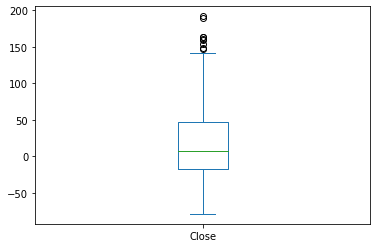

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitcoin Price February 04, 2018'}, xlabel='Timestamp'>

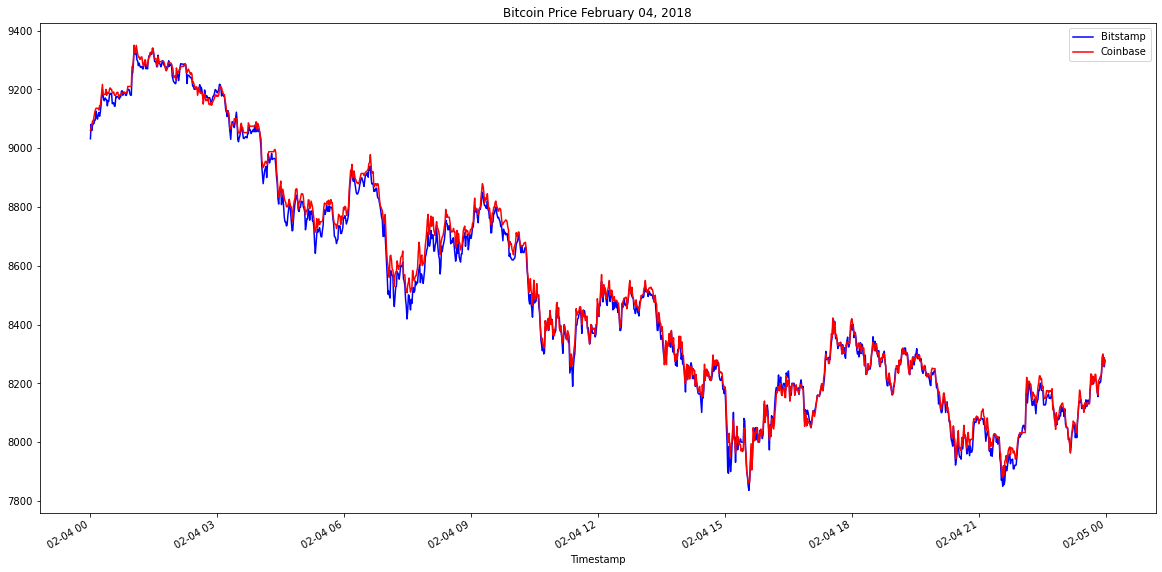

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp["Close"].loc["2018-02-04"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price February 04, 2018", color="blue", label="Bitstamp")
coinbase["Close"].loc["2018-02-04"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase["Close"].loc["2018-02-04"] - bitstamp["Close"].loc["2018-02-04"]
# YOUR CODE HERE

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1438.000000
mean       16.183561
std        21.376198
min       -47.890000
25%         1.882500
50%        15.785000
75%        28.662500
max       142.520000
Name: Close, dtype: float64

<AxesSubplot:>

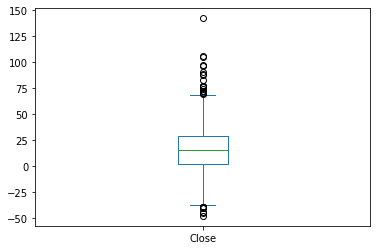

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind="box")

<AxesSubplot:title={'center':'Bitcoin Price March 12, 2018'}, xlabel='Timestamp'>

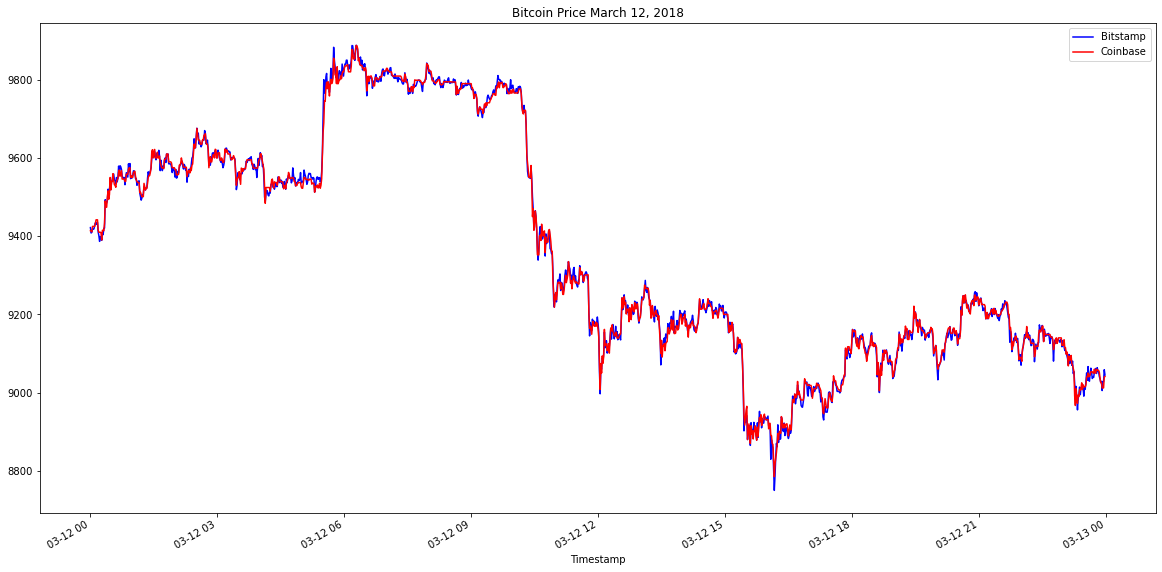

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp["Close"].loc["2018-03-12"].plot(legend=True, figsize=(20, 10), title="Bitcoin Price March 12, 2018", color="blue", label="Bitstamp")
coinbase["Close"].loc["2018-03-12"].plot(legend=True, figsize=(20, 10), color="red", label="Coinbase")

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase["Close"].loc["2018-03-12"] - bitstamp["Close"].loc["2018-03-12"]
# YOUR CODE HERE

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1433.00000
mean       -0.37947
std        10.72416
min      -110.00000
25%        -6.91000
50%        -0.07000
75%         6.05000
max        61.43000
Name: Close, dtype: float64

<AxesSubplot:>

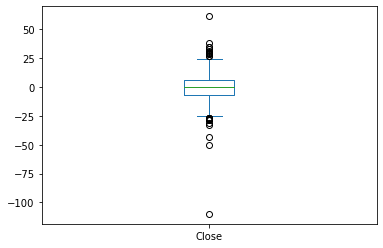

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
pos_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
# YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
pos_spread_early.describe()

count    810.000000
mean      47.239704
std       35.729720
min        0.010000
25%       17.377500
50%       39.970000
75%       70.665000
max      192.000000
Name: Close, dtype: float64

In [33]:
#middle describe
pos_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
pos_spread_middle.describe()

count    1122.000000
mean       23.829456
std        17.131967
min         0.040000
25%        10.945000
50%        21.040000
75%        32.650000
max       142.520000
Name: Close, dtype: float64

In [34]:
#late describe
pos_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
pos_spread_late.describe()

count    707.000000
mean       7.770240
std        6.618302
min        0.010000
25%        2.965000
50%        6.160000
75%       10.970000
max       61.430000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [35]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = pos_spread_early / bitstamp['Close'].loc["2018-01-10"]
# YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_early.describe()

count    8.100000e+02
mean     3.393199e-03
std      2.603829e-03
min      6.849320e-07
25%      1.209725e-03
50%      2.839975e-03
75%      5.044839e-03
max      1.401180e-02
Name: Close, dtype: float64

In [36]:
#middle return
spread_return_middle = pos_spread_middle / bitstamp['Close'].loc["2018-02-04"]
spread_return_middle.describe()

count    1122.000000
mean        0.002795
std         0.002019
min         0.000005
25%         0.001270
50%         0.002475
75%         0.003810
max         0.016786
Name: Close, dtype: float64

In [37]:
#late return
spread_return_late = pos_spread_late / bitstamp['Close'].loc["2018-03-12"]
spread_return_late.describe() 

count    707.000000
mean       0.000838
std        0.000727
min        0.000001
25%        0.000322
50%        0.000659
75%        0.001184
max        0.006957
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [38]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
# YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()

Timestamp
2018-01-10 02:22:00    0.010001
2018-01-10 03:04:00    0.010719
2018-01-10 03:05:00    0.013895
2018-01-10 03:06:00    0.011597
2018-01-10 03:17:00    0.011663
Name: Close, dtype: float64

In [39]:
#middle profitable trades
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_middle.head()

Timestamp
2018-02-04 07:02:00    0.011368
2018-02-04 07:05:00    0.016786
2018-02-04 07:29:00    0.010544
2018-02-04 07:30:00    0.010373
2018-02-04 07:46:00    0.010583
Name: Close, dtype: float64

In [40]:
#late profitable trades
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [41]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe()

count    14.000000
mean      0.011375
std       0.001300
min       0.010001
25%       0.010540
50%       0.010963
75%       0.011913
max       0.014012
Name: Close, dtype: float64

In [42]:
#middle describe
profitable_trades_middle.describe()

count    8.000000
mean     0.012206
std      0.002204
min      0.010373
25%      0.010573
50%      0.011319
75%      0.013327
max      0.016786
Name: Close, dtype: float64

In [43]:
#late describe, there were no winning trades
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [44]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc["2018-01-10"]
# YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
# YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early

Timestamp
2018-01-10 02:22:00    140.01
2018-01-10 03:04:00    148.70
2018-01-10 03:05:00    192.00
2018-01-10 03:06:00    160.49
2018-01-10 03:17:00    159.10
2018-01-10 03:18:00    163.00
2018-01-10 03:19:00    190.00
2018-01-10 03:34:00    137.13
2018-01-10 03:53:00    141.01
2018-01-10 03:54:00    163.00
2018-01-10 05:00:00    138.89
2018-01-10 05:18:00    147.64
2018-01-10 05:25:00    154.28
2018-01-10 23:50:00    141.35
Name: Close, dtype: float64

In [45]:
#middle profit
profit_middle = profitable_trades_middle * bitstamp['Close'].loc["2018-02-04"]
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Timestamp
2018-02-04 07:02:00     96.67
2018-02-04 07:05:00    142.52
2018-02-04 07:29:00     88.77
2018-02-04 07:30:00     87.61
2018-02-04 07:46:00     90.90
2018-02-04 07:58:00     97.60
2018-02-04 15:04:00    105.01
2018-02-04 15:05:00    106.02
Name: Close, dtype: float64

In [46]:
#late profit
profit_late = profitable_trades_late * bitstamp['Close'].loc["2018-03-12"]
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [47]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

count     14.000000
mean     155.471429
std       17.641360
min      137.130000
25%      141.095000
50%      151.490000
75%      162.372500
max      192.000000
Name: Close, dtype: float64

In [48]:
profit_per_trade_middle.describe()

count      8.0000
mean     101.8875
std       17.8088
min       87.6100
25%       90.3675
50%       97.1350
75%      105.2625
max      142.5200
Name: Close, dtype: float64

In [49]:
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'2018-01-10 Winning Trades'}, xlabel='Timestamp'>

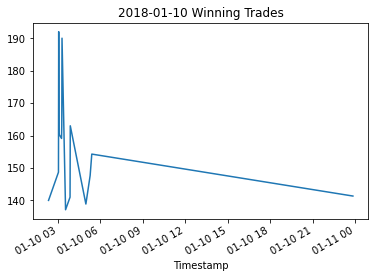

In [60]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
# There are no winning trades above 1% on this day.
profit_per_trade_early.plot(title="2018-01-10 Winning Trades")

<AxesSubplot:title={'center':'2018-02-04 Winning Trades'}, xlabel='Timestamp'>

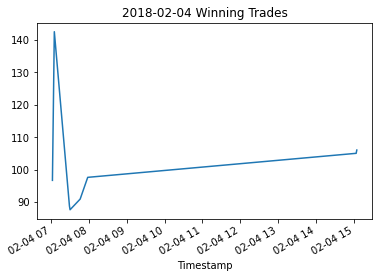

In [61]:
#middle graph
profit_per_trade_middle.plot(title="2018-02-04 Winning Trades")

<AxesSubplot:title={'center':'2018-03-12 Winning Trades'}, xlabel='Timestamp'>

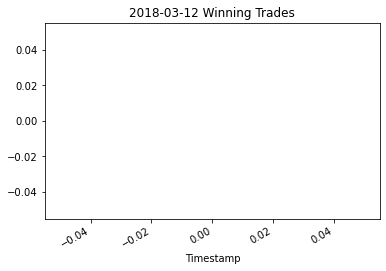

In [62]:
#late graph
#there are no winning trades it should be blank
profit_per_trade_late.plot(title="2018-03-12 Winning Trades")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.sum()

2176.600000000002

In [54]:
#profit middle
profit_per_trade_middle.sum()

815.1000000000022

In [55]:
#profit late
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [56]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
# YOUR CODE HERE

<AxesSubplot:xlabel='Timestamp'>

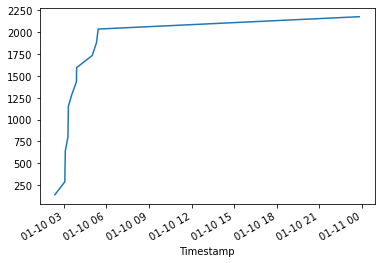

In [57]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot()
#our winning trades were mostly early in the day

<AxesSubplot:xlabel='Timestamp'>

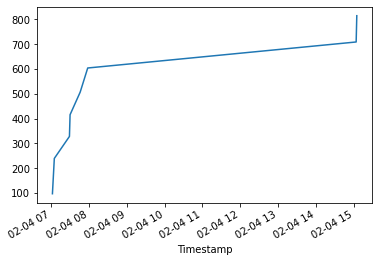

In [58]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot()
#our winning trades were mostly early in the day

<AxesSubplot:xlabel='Timestamp'>

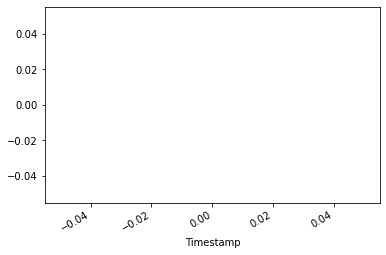

In [59]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.plot()
#no winning trades, should be blank

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** As time goes on the two markets become more efficent, as a result of that our profits shrink.  In January we had the highest number of winning trades and per trade we were also making the most amount of profit.  In febuary our trades drop from 14 to 8 and our average profit drops from $155.47 to 101.89.  Come March our profits have tried up and we don't have any winning trades.  The markets weren't perfectly effient by March, there were still trades available but not below our 1% metric.